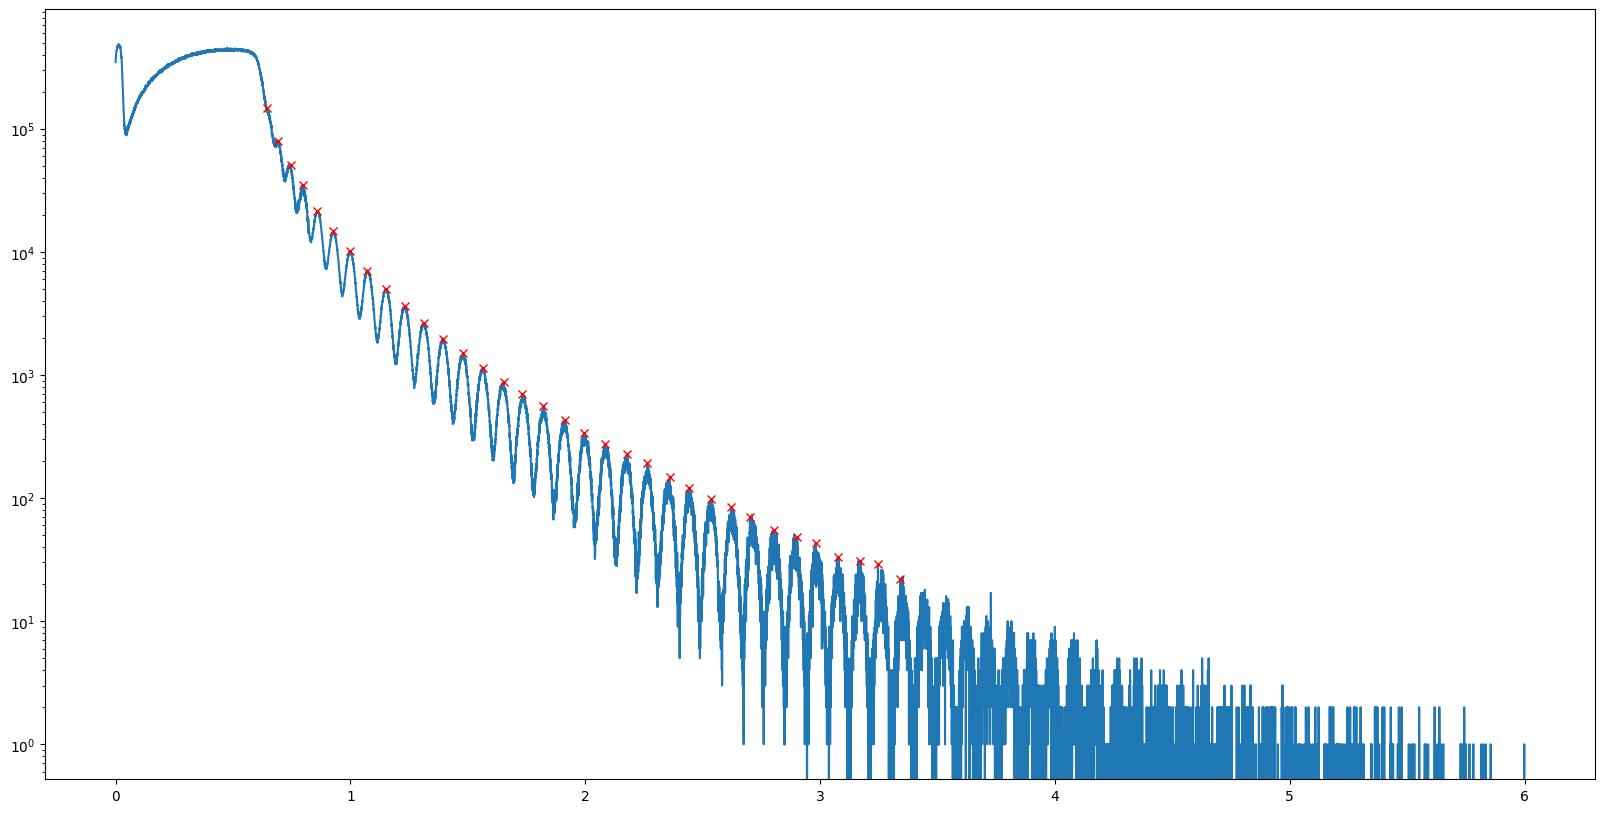

Film Thickness (Angstrom): 916.2983566979949
Film Thickness (Alt. method, Angstrom): 1079.493763448415
Surface Roughness (Angstrom): 16.720552468650617


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the data
data = pd.read_excel('SmallAngleXRR.xlsx')

theta = data['Two_Theta(degrees)']
intens = data['Intensity(a.u.)']
wavelength = 1.5406

# Identify peaks
pk_indices, _ = find_peaks(intens, distance=125, threshold=8)

theta_peaks = theta[pk_indices[11:]]
intens_peaks = intens[pk_indices[11:]]

# Plotting the data with peaks
plt.figure(figsize=(20,10))
plt.plot(theta, intens)
plt.yscale('log')
plt.plot(theta_peaks, intens_peaks, 'rx', label='Peaks')
plt.show()

# Convert to radians
rad_theta = np.array(theta_peaks * np.pi / 360)
order = np.array(range(1, len(theta_peaks) + 1))

# Linear fit to calculate thickness
m_slope, _ = np.polyfit(rad_theta**2, order**2, 1)
thickness = np.sqrt(m_slope * wavelength**2 / 4)

# Calculate thickness using average angular difference
theta_diff = [rad_theta[i+1] - rad_theta[i] for i in range(len(rad_theta) - 1)]
avg_theta_diff = sum(theta_diff) / len(theta_diff)
thickness_alt = wavelength / (2 * avg_theta_diff)

print('Film Thickness (Angstrom):', thickness)
print('Film Thickness (Alt. method, Angstrom):', thickness_alt)

# Log transform for surface roughness calculation
log_intens_peaks = np.log(intens_peaks)

# Fit a line for roughness estimation
rough_fit = np.polyfit(rad_theta**2, log_intens_peaks, 1)
roughness_est = np.sqrt(-rough_fit[0] * wavelength**2 / (8 * np.pi**2))
print(f"Surface Roughness (Angstrom): {roughness_est}")


